In [2]:
import pandas as pd
import numpy as np
import math
import risk_kit as rk
import strategy as strat
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#files name
file_path = "Prices.txt"
ref_path = "Referential.txt"

In [4]:
#read CSV data : the csv files must be in the same folder as the code
df_prices=pd.read_csv(file_path, sep="\t", decimal=".")
df_ref=pd.read_csv(ref_path, sep="\t", decimal=".")

## Benchmark

In [5]:
#retreving data in a dictionnary
dico_bench_prices = rk.retrieve_data(df_prices)

In [6]:
#retrieving benchmark prices from the dictionnary
prix_bench = rk.retrieve_Nav(dico_bench_prices)

In [7]:
#Benchmark Weights definition
weights = pd.Series()
weights["US4642875078"] = 0.30
weights["US4642875318"] = 0.1
weights["US4642875235"] = 0.1
weights["US4642874402"] = 0.05
weights["US4642871929"] = 0.15
weights["US4642872000"] = 0.2
weights["US4642864007"] = 0.1

In [8]:
#benchmark data from 01/01/2010
prix_bench_2010 = prix_bench.loc["2010-01-01":]

In [9]:
#nav = rk.fill_Nav(nav)
portfolio_bench = rk.benchmark_return(prix_bench_2010.copy(),weights)

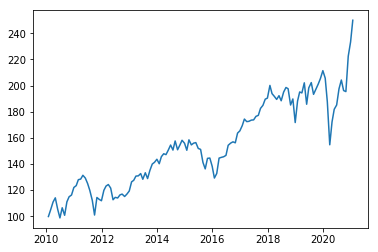

In [10]:
#Benchmark Plot
strat.plot_portfolio(portfolio_bench)

### Univers d'Investissement

In [11]:
isin_univers = [isin for isin in df_ref["ISIN"]]
dico_univers = rk.retrieve_data(df_prices,isin_univers)
df_univers_nav = rk.retrieve_Nav(dico_univers,False)

### Traitement Data

In [12]:
#signal momentum
df_momentum = strat.signal_momentum(df_univers_nav)

In [13]:
df_momentum_2010 = df_momentum.loc["2010-01-01":]

In [14]:
df_prices_univers_2010 = df_univers_nav.loc["2010-01-01":]

# Portfolio Strategie

In [15]:
Benchmark_Isin = ["US4642875078", "US4642875318", "US4642875235","US4642874402", "US4642871929", "US4642872000", "US4642864007"]

In [17]:
# Description :
    # 80% dans le bench + 2 actifs (10% chacun) choisi selon le momentum 1Y
strategy_portfolio = strat.strategie(df_prices_univers_2010.copy(),df_momentum_2010.copy(),weights, Benchmark_Isin)

1.0


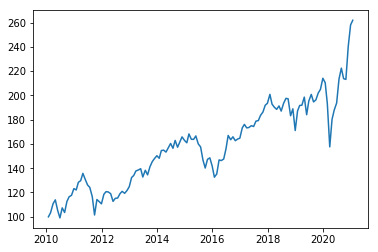

In [18]:
strat.plot_portfolio(strategy_portfolio["Portfolio Return"])

## Performance

   ### Portefeuille

In [19]:
np.cumprod(1+strategy_portfolio["Portfolio Return"])[-1]

2.6186014209177193

### Benchmark

In [20]:
np.cumprod(1+portfolio_bench)[-1]

2.50002811141269

#### Le portefeuille bat le benchmark de 11.9%

# Suivi Risque Ex_Ante : Vol Ex_ante et Tracking Error

### Vol Ex_ante

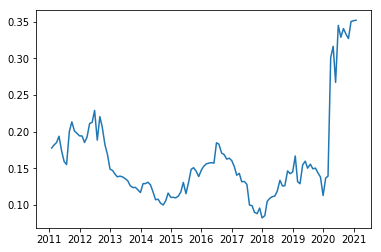

In [21]:
plt.plot(strategy_portfolio["Vol Ex_Ante"])

Nombre de Vol_Ex_ante ayant dépassé 15% : 54 / 121

In [45]:
sum(strategy_portfolio["Vol Ex_Ante"]>0.15)

54

In [47]:
sum(strategy_portfolio["Vol Ex_Ante"][:"2020-02-14"]>0.15)

43

### Tracking Error

In [31]:
#Tracking Error on all the dataset
(strategy_portfolio["Portfolio Return"]-portfolio_bench).std()*(12)**0.5

0.0454927928200619

In [71]:
#Tracking Error après 1Y de performance
TE_series = rk.traking_error_series(strategy_portfolio["Portfolio Return"],portfolio_bench,12)

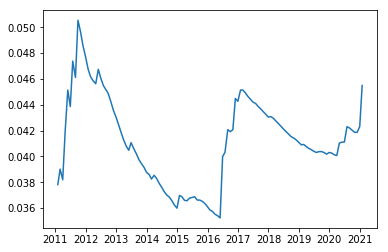

In [72]:
plt.plot(TE_series)

#### la Tracking Error, de maximum TE_max = 5.05%, n'excède pas 10%

## Stratégie de Test

In [111]:
# Description :
    #On alloue 70% aux benchmark et 30% sur un actif risqué choisi selon le momentum
    #rebanlancement tous les mois
test = strat.strategie(df_prices_univers_2010.copy(),df_momentum_2010.copy(),weights, Benchmark_Isin, bench_weights = 0.7, number_assets_portfolio = 1)

0.9999999999999999


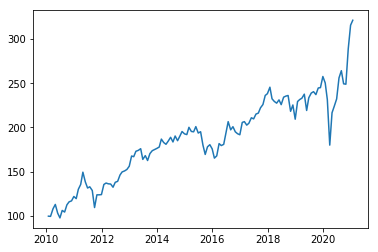

In [113]:
strat.plot_portfolio(test["Portfolio Return"])

In [114]:
np.cumprod(1+test["Portfolio Return"])[-1]

3.210730654550006

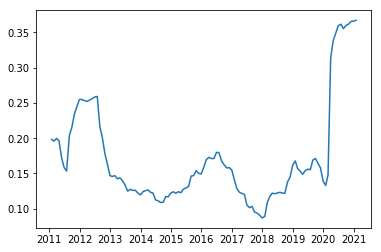

In [103]:
plt.plot(test["Vol Ex_Ante"])

In [100]:
sum(test["Vol Ex_Ante"]>0.15)

51

##### La vol Ex_Ante a dépassé 51 fois sur 121

In [69]:
(test["Portfolio Return"]-portfolio_bench).std()*(12)**0.5

0.08743077989076235

In [73]:
TE_series_test = rk.traking_error_series(test["Portfolio Return"],portfolio_bench,12)

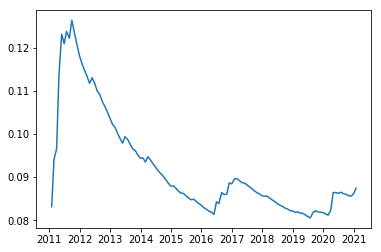

In [74]:
plt.plot(TE_series_test)

#### La Tracking Error a dépassé 10% : elle a atteint 12.63% le 30/09/2011
Cette stratégie a donc été abandonnée malgré sa surperformance

# Risque Ex_post du Portefeuille

In [21]:
rk.summary_stats_serie(strategy_portfolio["Portfolio Return"],12)

Overall Performance        1.621221
Annualized Return          0.090738
Annualized Vol             0.163236
Skewness                  -0.404371
Kurtosis                   5.144833
Cornish-Fisher VaR (5%)    0.072061
Historic VaR (5%)          0.069297
Historic CVaR (5%)         0.101490
Sharpe Ratio Annualisé     0.555871
Sharpe_ratio               9.931752
Max Drawdown              -0.264051
dtype: float64

## Risque Ex_Post du Benchmark

In [26]:
rk.summary_stats_serie(portfolio_bench,12)

Overall Performance        1.505033
Annualized Return          0.086188
Annualized Vol             0.159181
Skewness                  -0.362416
Kurtosis                   4.809077
Cornish-Fisher VaR (5%)    0.070262
Historic VaR (5%)          0.068852
Historic CVaR (5%)         0.098498
Sharpe Ratio Annualisé     0.541444
Sharpe_ratio               9.454864
Max Drawdown              -0.268336
dtype: float64

# Bull Market 2019

In [23]:
debut_2019 = portfolio_bench.index[-25]
fin_2019 = portfolio_bench.index[-14]

In [24]:
strategy_portfolio_return_2019 = strategy_portfolio["Portfolio Return"][debut_2019:fin_2019]

In [212]:
portfolio_bench_2019 = portfolio_bench[debut_2019:fin_2019]

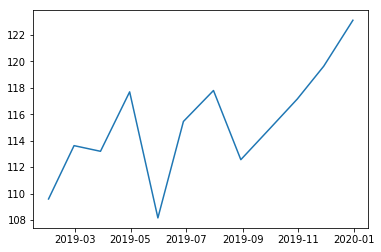

In [226]:
strat.plot_portfolio(portfolio_bench_2019)

### Risque Ex_Post 2019

In [25]:
rk.summary_stats_serie(strategy_portfolio_return_2019,12)

Overall Performance        0.143833
Annualized Return          0.251770
Annualized Vol             0.147550
Skewness                  -0.529598
Kurtosis                   3.476498
Cornish-Fisher VaR (5%)    0.052892
Historic VaR (5%)          0.049816
Historic CVaR (5%)         0.073152
Sharpe Ratio Annualisé     1.706338
Sharpe_ratio               0.974812
Max Drawdown              -0.073152
dtype: float64

#### Calcul du Beta, Alpha et R2

In [215]:
y = portfolio_bench_2019
lines = y>0
y=y[lines]
x = pd.DataFrame(strategy_portfolio_return_2019)[lines]
reg = LinearRegression().fit(x,y)

alpha_bull_2019 = reg.intercept_
beta_bull_2019 = reg.coef_[0]
R2_bull_2019 = reg.score(x,y)

#### Performance du marché

In [221]:
prices_bench_2019 = 100*(1+portfolio_bench_2019).cumprod()
b_price_2019 = prices_bench_2019.loc[debut_2019]
e_price_2019 = prices_bench_2019.loc[fin_2019]
bull_2019 = e_price_2019/b_price_2019 - 1
bull_2019

0.1234982657358239

##### Pendant le Bull Market de 2019, le marché a pris 12.3%

In [223]:
Bull_2019 = beta_bull_2019 * bull_2019
Bull_2019

0.11489259420364337

#### Si une année comme celle de 2019 est ammenée à se reproduire, la performance du portefeuille serait de 11.49%

# Crise Covid

In [191]:
end = portfolio_bench.index[-11]
debut = portfolio_bench.index[-13]
eoy = portfolio_bench.index[-2]

In [219]:
prices_bench = 100*(1+portfolio_bench).cumprod()
b_price = prices_bench.loc[debut]
e_price = prices_bench.loc[end]
stress_covid = e_price/b_price-1
stress_covid

-0.24798257987672967

#### Le marché a chuté de 24.8% à cause du Covid

### Calcul du Beta, Alpha, R2

In [162]:
from sklearn.linear_model import LinearRegression

In [169]:
y = portfolio_bench
x = pd.DataFrame(strategy_portfolio["Portfolio Return"])
reg = LinearRegression().fit(x,y)
alpha = reg.intercept_
beta = reg.coef_[0] 
R2 = reg.score(x,y)

In [193]:
Stress_Covid = beta * stress_covid

In [194]:
Stress_Covid

-0.23226797577368669

#### Si une nouvelle crise Covid arrivait, la baisse du marché aurait entrainé une perte de 23.22% sur le portefeuille

## Reprise Covid

In [224]:
eoy_price = prices_bench.loc[eoy]
covid_reprise = eoy_price/e_price - 1
covid_reprise

0.5089319305580144

#### Le marché a perdu 24.79% mais a repris 50.89% pendant la reprise

In [198]:
Reprise_Covid = beta*covid_reprise
Reprise_Covid

0.47668102080422387

#### Si une reprise du marché arrivait, elle aurait entrainé une hausse de 47.6% de notre stratégie